In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Data Loading & Understanding

In [2]:
df = pd.read_csv('Business_Analytics_Dataset_10000_Rows.csv')

In [3]:
print(df.head())

   Order_ID Customer_ID  Order_Date Region Product_Category Customer_Segment  \
0         1    CUST3818  2024-08-18  North         Clothing        Corporate   
1         2    CUST9689  2024-06-19  South           Beauty      Home Office   
2         3    CUST9147  2024-11-21   West           Sports        Corporate   
3         4    CUST7938  2024-07-19  North         Clothing         Consumer   
4         5    CUST5127  2024-10-28  South   Home & Kitchen         Consumer   

   Quantity  Unit_Price  Discount_Rate  Revenue     Cost  Profit  \
0         5      300.68           0.27  1097.48   768.29  329.19   
1         9       32.89           0.02   290.09   179.33  110.76   
2         5      345.61           0.25  1296.04  1022.60  273.44   
3         1      444.50           0.06   417.83   280.99  136.84   
4         5       65.13           0.21   257.26   151.90  105.36   

  Payment_Method  
0    Credit Card  
1     Debit Card  
2    Credit Card  
3            UPI  
4    Credit Car

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          10000 non-null  int64  
 1   Customer_ID       10000 non-null  object 
 2   Order_Date        10000 non-null  object 
 3   Region            10000 non-null  object 
 4   Product_Category  10000 non-null  object 
 5   Customer_Segment  10000 non-null  object 
 6   Quantity          10000 non-null  int64  
 7   Unit_Price        10000 non-null  float64
 8   Discount_Rate     10000 non-null  float64
 9   Revenue           10000 non-null  float64
 10  Cost              10000 non-null  float64
 11  Profit            10000 non-null  float64
 12  Payment_Method    10000 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 1015.8+ KB
None


In [5]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Order_ID            0
Customer_ID         0
Order_Date          0
Region              0
Product_Category    0
Customer_Segment    0
Quantity            0
Unit_Price          0
Discount_Rate       0
Revenue             0
Cost                0
Profit              0
Payment_Method      0
dtype: int64


In [23]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Revenue Distribution')

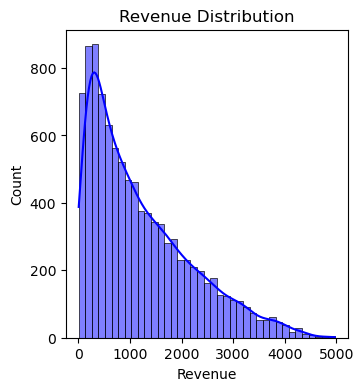

In [15]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Revenue'], kde=True, color='blue')
plt.title('Revenue Distribution')

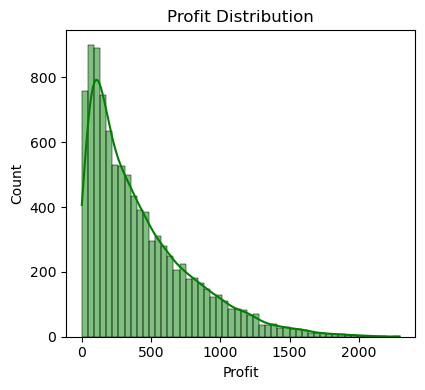

In [16]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 2)
sns.histplot(df['Profit'], kde=True, color='green')
plt.title('Profit Distribution')
plt.tight_layout()
plt.show()

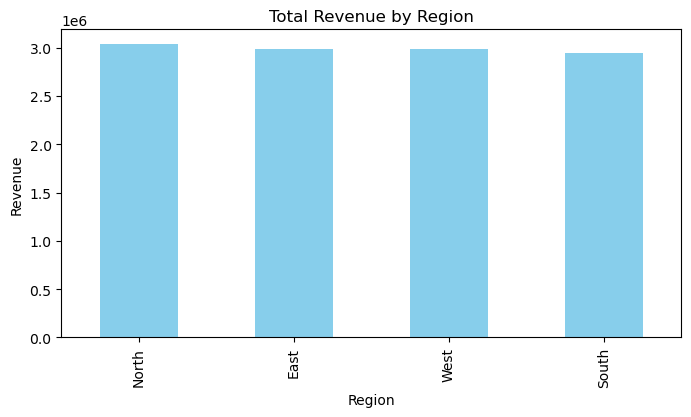

In [17]:
plt.figure(figsize=(8, 4))
region_rev = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
region_rev.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Region')
plt.ylabel('Revenue')
plt.show()

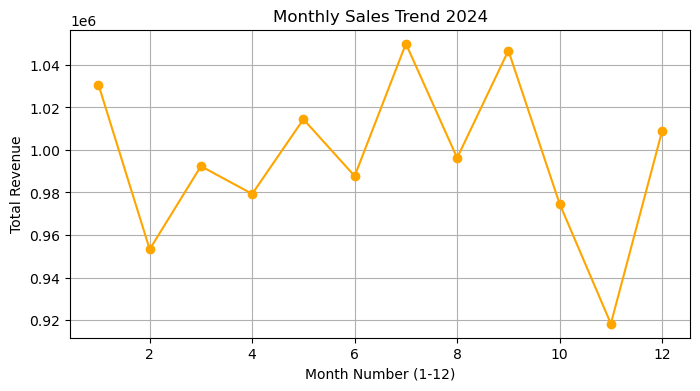

In [19]:
df['Month'] = df['Order_Date'].dt.strftime('%B')
monthly_trend = df.groupby(df['Order_Date'].dt.month)['Revenue'].sum()
plt.figure(figsize=(8, 4))
monthly_trend.plot(kind='line', marker='o', color='orange')
plt.title('Monthly Sales Trend 2024')
plt.xlabel('Month Number (1-12)')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

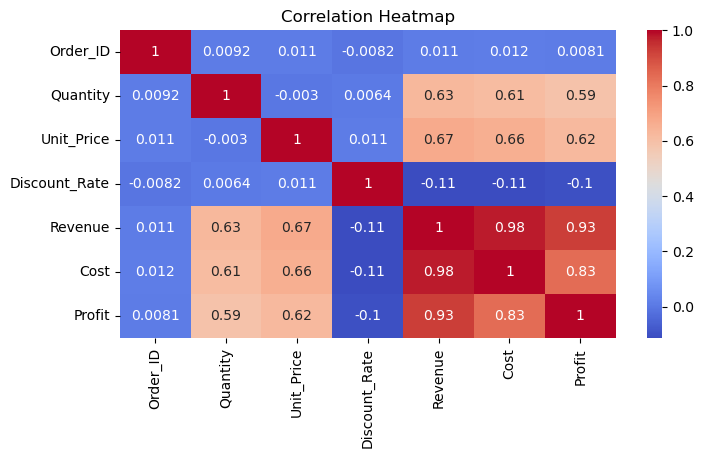

In [22]:
plt.figure(figsize=(8, 4))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Wakeel PC\AppData\Local\Temp\ipykernel_13500\398709205.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='magma')


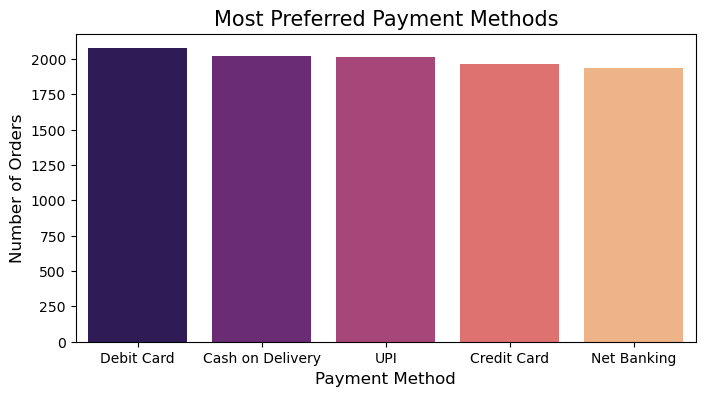

In [26]:
payment_counts = df['Payment_Method'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='magma')
plt.title('Most Preferred Payment Methods', fontsize=15)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.show()